In [44]:
def parseData(s, s2) :
    s = s[len('Total duration:'):]
    total_duration = int(s[:-len(' sec ')])
    s2 = s2[len('  network size:'):]
    nb_clusters = int(s2[:s2.index('nodes')])
    return (total_duration, nb_clusters)

def readData(file) : 
    lines = open(file).readlines()
    i = 0
    t_duration = []
    nb_clusters = []
    for  line in lines:
        if "Total duration" in line:
            t, nb = parseData(line, lines[i-4])
            t_duration.append(t)
            nb_clusters.append(nb)
        i+=1
    return (t_duration, nb_clusters)

def get_reorder_data(file) :
    tmp = readData(file)
    tmp_reorder_time = []
    tmp_classic_time = []
    for i in range(len(tmp[0])) :
        if i % 2 == 0 :
            tmp_classic_time.append(tmp[0][i])
        else :
            tmp_reorder_time.append(tmp[0][i])
    tmp_reorder_cluster = []
    tmp_classic_cluster = []
    for i in range(len(tmp[1])) :
        if i % 2 == 0 :
            tmp_classic_cluster.append(tmp[1][i])
        else :
            tmp_reorder_cluster.append(tmp[1][i])
    return (tmp_classic_time, tmp_classic_cluster, tmp_reorder_time, tmp_reorder_cluster)
    
inet_classic_time, inet_classic_cluster, inet_reorder_time, inet_reorder_cluster = get_reorder_data('inet_data_random.txt')
_,_, inet_max_time, inet_max_cluster = get_reorder_data('inet_data_max.txt')
_,_, inet_min_time, inet_min_cluster = get_reorder_data('inet_data_min.txt')
ip_classic_time, ip_classic_cluster, ip_reorder_time, ip_reorder_cluster = get_reorder_data('ip_data_random.txt')
_,_, ip_max_time, ip_max_cluster = get_reorder_data('ip_data_max.txt')
_,_, ip_min_time, ip_min_cluster = get_reorder_data('ip_data_min.txt')

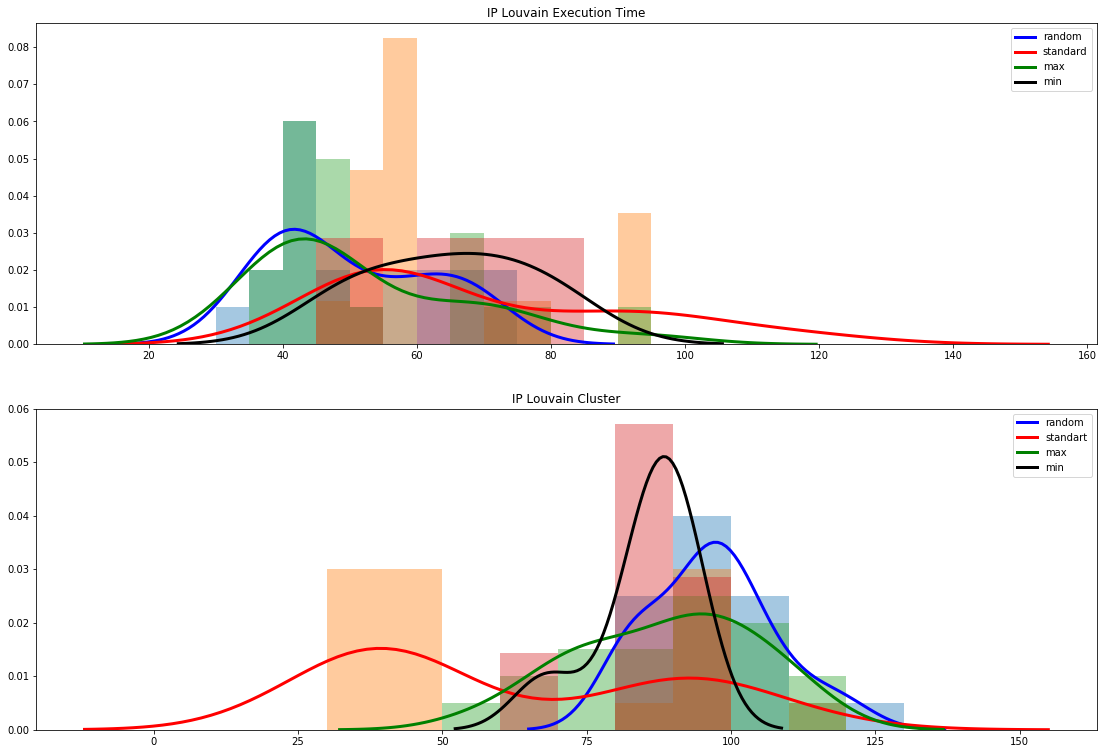

In [65]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (19, 13)


bins = range(20, 100, 5)
bins_c = range(0, 150, 10)
hist = True
ax1 = plt.subplot(211)
ax1.title.set_text('IP Louvain Execution Time')

sns.distplot(ip_reorder_time, kde_kws={"color": "b", "lw": 3, "label": "random"}, bins = bins,hist = hist);

sns.distplot(ip_classic_time, kde_kws={"color": "r", "lw": 3, "label": "standard"}, bins = bins, hist = hist);

sns.distplot(ip_max_time, kde_kws={"color": "g", "lw": 3, "label": "max"}, bins = bins,hist = hist);

sns.distplot(ip_min_time, kde_kws={"color": "black", "lw": 3, "label": "min"}, bins = bins,hist = hist);


ax2 = plt.subplot(212)
ax2.title.set_text('IP Louvain Cluster')

sns.distplot(ip_reorder_cluster, kde_kws={"color": "b", "lw": 3, "label": "random"}, bins = bins_c,hist = hist, norm_hist = False);

sns.distplot(ip_classic_cluster, kde_kws={"color": "r", "lw": 3, "label": "standart"}, bins = bins_c,hist = hist, norm_hist = False);

sns.distplot(ip_max_cluster, kde_kws={"color": "g", "lw": 3, "label": "max"}, bins = bins_c,hist = hist, norm_hist = False);

sns.distplot(ip_min_cluster, kde_kws={"color": "black", "lw": 3, "label": "min"}, bins = bins_c,hist = hist, norm_hist = False);

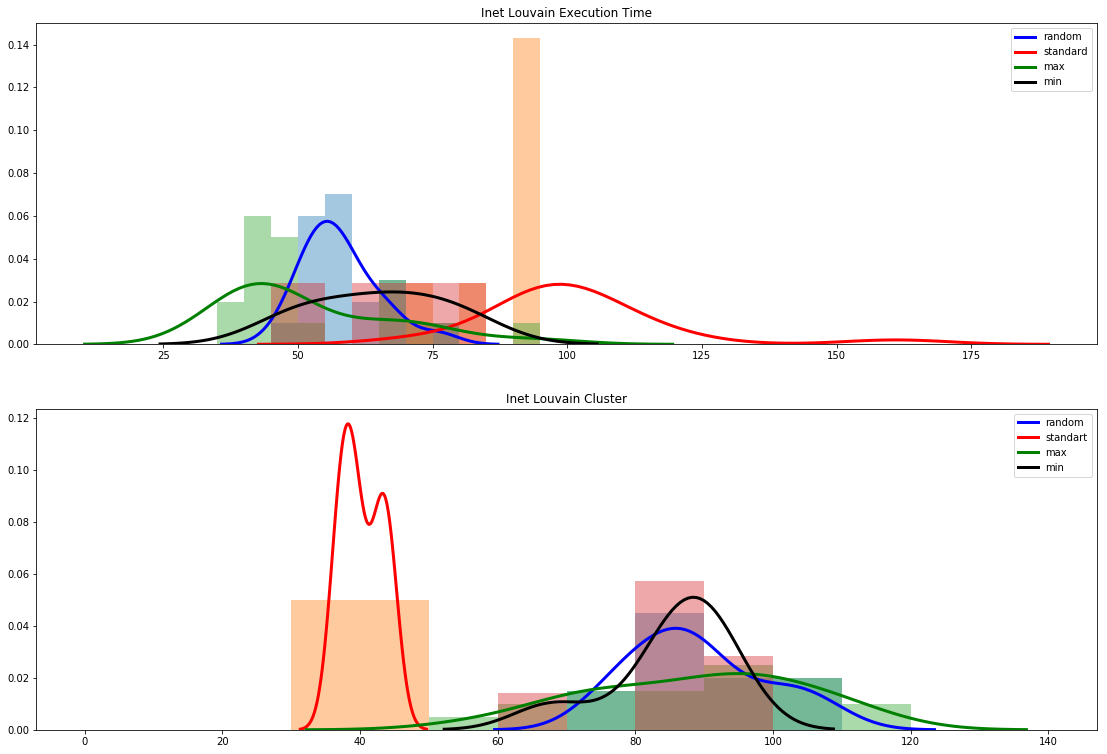

In [71]:
ax1 = plt.subplot(211)
ax1.title.set_text('Inet Louvain Execution Time')

sns.distplot(inet_reorder_time, kde_kws={"color": "b", "lw": 3, "label": "random"}, bins = bins,hist = hist);

sns.distplot(inet_classic_time, kde_kws={"color": "r", "lw": 3, "label": "standard"}, bins = bins, hist = hist);

sns.distplot(ip_max_time, kde_kws={"color": "g", "lw": 3, "label": "max"}, bins = bins,hist = hist);

sns.distplot(ip_min_time, kde_kws={"color": "black", "lw": 3, "label": "min"}, bins = bins,hist = hist);

ax2 = plt.subplot(212)
ax2.title.set_text('Inet Louvain Cluster')

sns.distplot(inet_reorder_cluster, kde_kws={"color": "b", "lw": 3, "label": "random"}, bins = bins_c,hist = hist, norm_hist = False);

sns.distplot(inet_classic_cluster, kde_kws={"color": "r", "lw": 3, "label": "standart"}, bins = bins_c,hist = hist, norm_hist = False);

sns.distplot(ip_max_cluster, kde_kws={"color": "g", "lw": 3, "label": "max"}, bins = bins_c,hist = hist, norm_hist = False);

sns.distplot(ip_min_cluster, kde_kws={"color": "black", "lw": 3, "label": "min"}, bins = bins_c,hist = hist, norm_hist = False);

In [70]:
print(np.mean(inet_max_time), np.mean(inet_max_cluster))

60.35 90.3


In [69]:
print(np.mean(ip_max_time), np.mean(ip_max_cluster))

52.4 88.65
